# Assignment 2: Regression Analysis

---



# Question 1:


Write out the elements of the matrices XtX and XtY in the equation for the pseudo-inverse OLS estimator for parameter vector b = (α, βi)t . The elements of these matrices should be written in terms of the Yi and Xi,j.

**Solution**:



\begin{align}
\ X & =
    \begin{pmatrix}
    x_{11} & x_{21} & x_{31}  & x_{41}\\
     x_{12} & x_{22} & x_{32}  & x_{42}\\
        x_{13} & x_{23} & x_{33}  & x_{43}\\
     \\
     x_{1n} & x_{2n} & x_{3n}  & x_{4n}\\
    \end{pmatrix}
\\
\\
\\
\ X^\intercal  & =  \begin{pmatrix}
    x_{11} & x_{12} & x_{13}  & &x_{1n}\\
     x_{21} & x_{22} & x_{23}  && x_{2n}\\
      x_{31} & x_{32} & x_{33}  & &x_{3n}\\
       x_{41} & x_{42} & x_{43}  & &x_{4n}\\
    \end{pmatrix}
\\
\\
\\
\ Y & =   \begin{pmatrix}
    y_{1}\\
     y_{2}\\
      y_{3} \\
       y_{4}\\
       \\
        y_{n}\\
    \end{pmatrix}
    \\
    \\
    \\
\ X^\intercal X & =  \begin{pmatrix}
    x_{11} x_{11} + x_{12} x_{12} + x_{13} x_{13} +...+x_{1n} x_{1n} & ... &    x_{11} x_{41} + x_{12} x_{42} + x_{13} x_{43}  +..+x_{1n} x_{4n}\\
&...&\\
      ... & ... &   x_{41} x_{41} + x_{42} x_{42} + x_{43} x_{43} +...+x_{4n} x_{4n}\\
    \end{pmatrix}
    \\
    \\
    \\
\ X^\intercal Y & =  \begin{pmatrix}
    x_{11}y_1 + x_{12}y_2 + x_{13}y_3 +...+x_{1n}y_n\\
     x_{21}y_1 + x_{22}y_1 + x_{23}y_3 +...+x_{2n}y_n\\
      x_{31}y_1 + x_{32}y_1 + x_{33}y_3 +...+x_{3n}y_n\\
       x_{41}y_1 + x_{42}y_1 + x_{43}y_3 +...+x_{4n}y_n\\
    \end{pmatrix}
\end{align}



# Question 2:

**Load data and check simple facts **

In [0]:
# Import required library
import pandas as pd

# Insert data
data= [  
    [94.19,2.92,9.46,3.71,9.90],[98.59,9.90,0.84,8.15,8.59],[33.40,0.86,0.04,8.22,0.72],[105.71,8.96,5.83,1.31,11.83],
    [76.78,5.42,6.13,0.19,9.24],[114.00,6.00,9.88,1.96,12.70],[35.97,0.24,2.58,4.61,2.25],[113.87,7.47,8.17,3.13,12.51],
    [36.64,2.71,0.01,4.57,2.17],[83.47,1.00,8.84,6.14,7.87],[71.61,3.10,6.95,1.49,8.04],[149.66,9.06,9.96,8.07,15.22],
    [143.41,9.82,8.61,6.96,14.74],[98.65,9.43,3.78,2.16,10.57],[95.02,3.65,9.34,2.34,10.40],[78.02,8.15,0.41,5.78,6.85],
    [51.74,3.80,3.46,0.74,5.81],[55.66,6.26,0.01,2.52,5.01],[145.37,9.86,8.75,7.28,14.89],[98.38,9.19,4.54,0.78,10.98],
    [101.18,3.97,9.95,2.03,11.14],[49.31,5.59,0.26,1.11,4.68],[130.47,8.46,8.79,5.24,13.80],[85.31,8.45,2.13,3.96,8.47],
    [33.49,0.28,0.83,7.87,0.89],[138.09,9.62,8.33,6.15,14.36],[100.67,9.93,2.14,5.64,9.66],[47.00,2.95,3.13,1.53,4.87],
    [36.75,1.68,0.92,5.41,2.08],[100.14,3.69,9.91,2.58,10.88],[64.62,7.04,0.07,4.03,5.69],[122.44,9.20,7.26,3.80,13.17],
    [86.21,8.90,0.18,7.53,7.27],[39.89,1.06,3.13,2.95,3.35],[48.31,2.49,4.04,0.96,5.23],[34.18,1.33,0.03,7.29,1.09],
    [96.96,7.13,6.70,1.45,11.07],[44.35,0.07,5.42,0.83,4.40],[38.75,2.80,0.67,3.81,2.77],[94.64,0.21,10.00,9.57,8.17],
    [41.55,1.72,2.85,2.82,3.66],[40.40,0.61,4.09,1.59,3.76] 
]
# Assign column attributes as in excel
df = pd.DataFrame(data,columns=['Y','X1','X2','X3','X4'])

# Check facts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
Y     42 non-null float64
X1    42 non-null float64
X2    42 non-null float64
X3    42 non-null float64
X4    42 non-null float64
dtypes: float64(5)
memory usage: 1.7 KB


**About the data**


*   No Missing Values
*   N > 20 ... Should be okay



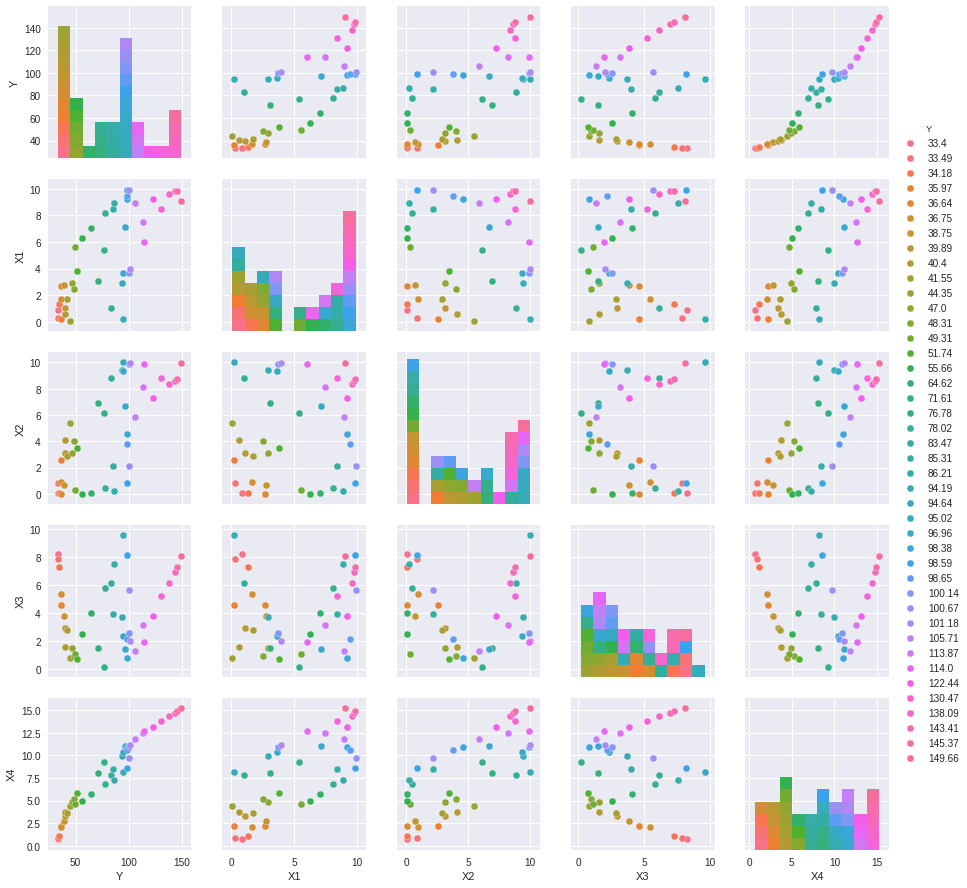

In [0]:
%matplotlib inline
#Check how data locks like in distribution
import seaborn as sns
sns.pairplot(df, hue="Y")
sns.plt.show()

The scatter plot matrix shows all possible two-way scatter plots for the five variables. 

**By just looking **at the scatter plot,

*   We can see a pretty strong linear relationship between Y and X4.
*   X3  skewed to the left.
*   X1, X2 have a few values






# ***Calculate OLS estimator b***

In [0]:
import numpy as np
from numpy.linalg import inv


X  = df.drop([ 'Y'],axis=1).values
Xt = np.transpose(X)
Y  = df.drop([ 'X1','X2','X3','X4'],axis=1).values
print ("Xt * X = ")
print (np.dot(Xt,X))
print ("Xt * Y = ")
print (np.dot(Xt,Y))
print ("( Xt * Y )-1= ")
print (  inv(    np.dot(Xt,X)   )    )
print ("b = ")
print (  inv(    np.dot(Xt,X)   ) * np.dot(Xt,Y)   )

Xt * X = 
[[1600.1482 1085.9585  892.767  2149.0514]
 [1085.9585 1486.2142  764.8118 2057.9189]
 [ 892.767   764.8118  950.6728 1326.1622]
 [2149.0514 2057.9189 1326.1622 3365.8543]]
Xt * Y = 
[[21035.6975]
 [19654.4312]
 [14210.2872]
 [32554.7341]]
( Xt * Y )-1= 
[[ 1.04513336e+03  1.04518967e+03 -2.56712466e-02 -1.30633309e+03]
 [ 1.04518967e+03  1.04525047e+03 -2.51907396e-02 -1.30640641e+03]
 [-2.56712466e-02 -2.51907396e-02  2.38800564e-03  3.08517350e-02]
 [-1.30633309e+03 -1.30640641e+03  3.08517350e-02  1.63281443e+03]]
b = 
[[ 2.19851092e+07  2.19862938e+07 -5.40012579e+02 -2.74796277e+07]
 [ 2.05426085e+07  2.05438035e+07 -4.95109659e+02 -2.56766748e+07]
 [-3.64795788e+02 -3.57967645e+02  3.39342460e+01  4.38412015e+02]
 [-4.25273264e+07 -4.25297132e+07  1.00437003e+03  5.31558397e+07]]


#  Question 3 
**TESTING NULL HYPOTHESIS **:

**H0:** There is no relationship between soil variables and the tomato fruits weight. 
(X variables are not useful for predicting fruits weight, Y) 

**H1**: At least one X variable is useful for predicting fruits weight , Y

This hypothesis will be tested using both correlation and multiple regression models. 

***Load only X3 and X4***

In [0]:
X34= df.drop([ 'X1','X2'],axis=1)

** Calculate Pearson Correlation between all  columns of the data frame**

In [0]:
# pairwise correlation
X34.corr(method='spearman')

,Y,X3,X4
Y,1.000000,0.064581,0.982659
X3,0.064581,1.000000,-0.038490
X4,0.982659,-0.038490,1.000000


In [0]:
# pairwise correlation - Colored: Blue means Weak, where Red means strong.
X34.corr(method='spearman').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Y,X3,X4
Y,1.0,0.064581,0.98266
X3,0.064581,1.0,-0.03849
X4,0.98266,-0.03849,1.0


***Finding***: 

*   There seems to be strong positive correlation between Y and X4. Wheres it is weak weak with X3.
*   No sign of Multicollinearity between X3 and X4. Which is good and give a relaibility to the coefficient estimates.

**MULTIPLE REGRESSION ANALYSIS **

The correlation analysis showed that some of the soil variables were highly interrelated **however it is not known how important these variables were in explaining the variations in fruits weight.** For that we need regression.

In [0]:
import statsmodels.api as sm

X34= df.drop([ 'Y','X1','X2'],axis=1)

X34 = sm.add_constant(X34) 

model = sm.OLS(df.Y, X34).fit()

print (model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9401.
Date:                Mon, 21 May 2018   Prob (F-statistic):           4.58e-53
Time:                        14:54:32   Log-Likelihood:                -79.217
No. Observations:                  42   AIC:                             164.4
Df Residuals:                      39   BIC:                             169.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4118      0.668      8.096      0.0

In [0]:
'{0:.55f}'.format(model.f_pvalue)

'0.0000000000000000000000000000000000000000000000000000458'

**Finding: **


*   F-statistics was significant and the overall explanatory power of the equation as in R2 is 99% which is very high.
*   Both of the coefficients of X3 & X4 are non zero.
*   T-value for X3 & X4 are siginificant from zero. Especially X4 with very hight t-value. Which means the impact of X4 on Y is very high.



*The F-statistic is 9401 and its associated  p-value is (0.000000000000000000000000000000000000000000000000000046) <<< significance level *

**So we reject  H0**

# Question 4
**TESTING NULL HYPOTHESIS **:

**H0:** There is no relationship between soil variables and the tomato fruits weight. 
(X variables are not useful for predicting fruits weight, Y) 

**H1**: At least one X variable is useful for predicting fruits weight , Y

** Calculate Pearson Correlation between all  columns of the data frame**

In [0]:
# pairwise correlation
df.corr(method='spearman')

,Y,X1,X2,X3,X4
Y,1.000000,0.785755,0.683144,0.064581,0.982659
X1,0.785755,1.000000,0.126499,0.072360,0.746860
X2,0.683144,0.126499,1.000000,-0.120097,0.736386
X3,0.064581,0.072360,-0.120097,1.000000,-0.038490
X4,0.982659,0.746860,0.736386,-0.038490,1.000000


In [0]:
# pairwise correlation - Colored: Blue means Weak, where Red means strong.
df.corr(method='spearman').style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Y,X1,X2,X3,X4
Y,1.0,0.78575,0.68314,0.064581,0.98266
X1,0.78575,1.0,0.1265,0.07236,0.74686
X2,0.68314,0.1265,1.0,-0.1201,0.73639
X3,0.064581,0.07236,-0.1201,1.0,-0.03849
X4,0.98266,0.74686,0.73639,-0.03849,1.0


***Finding***: 


*   There seems to be positive correlation between Y and all the input variables. Wheres it is strong in case of X4, and weak with X3.
*   ***Multicollinearity***, will cause coefficient estimates to be less reliable. We can see that X1 and X2 strongly correlated with X4.





**MULTIPLE REGRESSION ANALYSIS **

The correlation analysis showed that some of the soil variables were highly interrelated **however it is not known how important these variables were in explaining the variations in fruits weight.** For that we need regression.

In [0]:
import statsmodels.api as sm

X= df.drop([ 'Y'],axis=1)

X = sm.add_constant(X) 

model = sm.OLS(df.Y, X).fit()

print (model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8363.
Date:                Mon, 21 May 2018   Prob (F-statistic):           3.90e-54
Time:                        14:53:07   Log-Likelihood:                -66.034
No. Observations:                  42   AIC:                             142.1
Df Residuals:                      37   BIC:                             150.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4705      0.502     10.892      0.0

**Finding: **


*   Again F-statistics was significant and the overall explanatory power of the equation as in R2 is 99% which is very high.
*   All coefficients of X3 & X4 are non zero.
*   t-values for X3 & X2 &X1 are not siginificant different from zero. Especially in the previous question we found when X3 and X4 were included only, the t-value were much higher.



* ***This means the model had no satisfactory predictive ability due to the inclusion of some unimportant or redundant explanatory variables in the equation.***



* **Which means not all four variables are required to ‘explain’ Y.**




